# ts2g using ordinal partition strategy

In [29]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [30]:
import os
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from core import model 
from timeseries.ordinal_partition import TimeseriesToOrdinalPatternGraph
# from timeseries.strategies import TimeseriesToGraphStrategy

## Loading data 

We first load the dataset :)

In [31]:
amazon_data = pd.read_csv(os.path.join(os.getcwd(), "amazon", "AMZN.csv"))   

To properly use the ‘Date’ column, we convert it to datetime format and ensure the dates are recognized as date objects. We then set the ‘Date’ column as the index of the DataFrame. This creates a time-series structure, facilitating analysis and visualization over time.

In [32]:
amazon_data["Date"] = pd.to_datetime(amazon_data["Date"])
amazon_data.set_index("Date", inplace=True)

# How does the time series look like?

In [33]:
def plot_timeseries(sequence, title, x_legend, y_legend, color):
    plt.figure(figsize=(10, 6))
    plt.plot(sequence, linestyle='-', color=color)
    
    plt.title(title)
    plt.xlabel(x_legend)
    plt.ylabel(y_legend)
    plt.grid(True)
    plt.show()

In [34]:
def plot_timeseries_sequence(df_column, title, x_legend, y_legend, color='black'):
    sequence = model.Timeseries(model.TimeseriesArrayStream(df_column)).to_sequence()
    plot_timeseries(sequence, title, x_legend, y_legend, color)

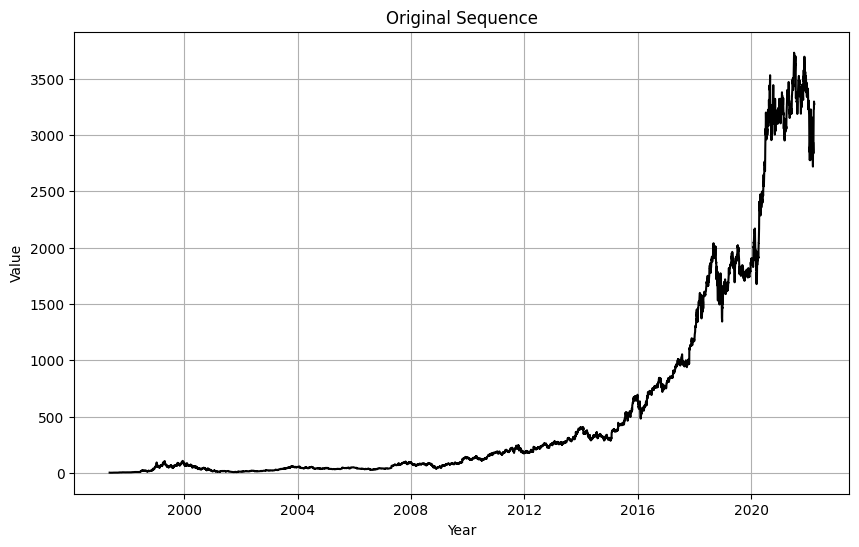

In [35]:
plot_timeseries_sequence(amazon_data["Close"], "Original Sequence", "Year", "Value")

Given the great length of the timeseries, let's focus on some sub-segments, so that we can better appreciate its behavior.

In [36]:
segment_1 = amazon_data[60:120]
segment_2 = amazon_data[4000:4060]
segment_3 = amazon_data[6000:6060]

How do the plots for these segments look like?

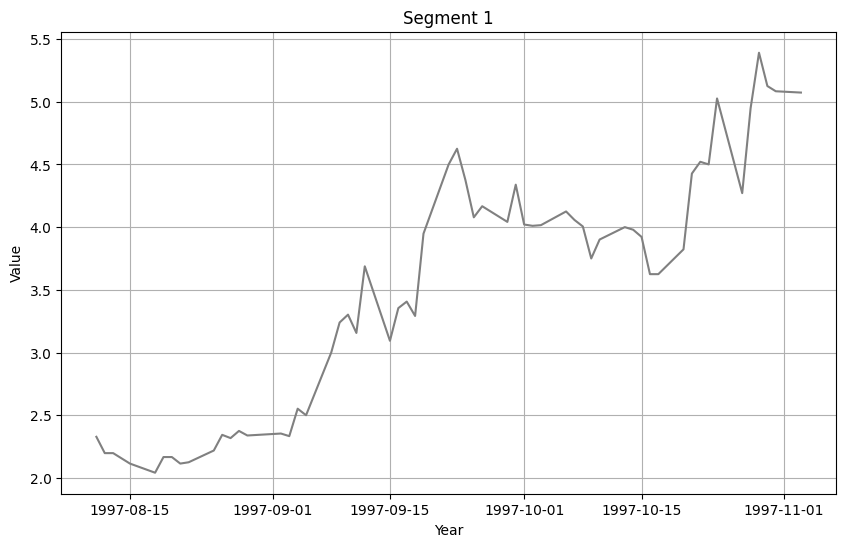

In [37]:
plot_timeseries_sequence(segment_1["Close"], "Segment 1", "Year", "Value", 'gray')

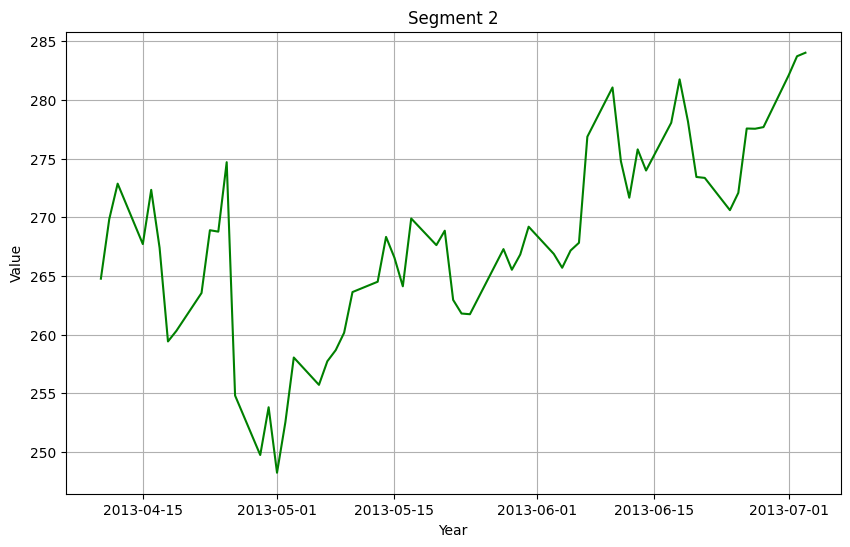

In [38]:
plot_timeseries_sequence(segment_2["Close"], "Segment 2", "Year", "Value", 'green')

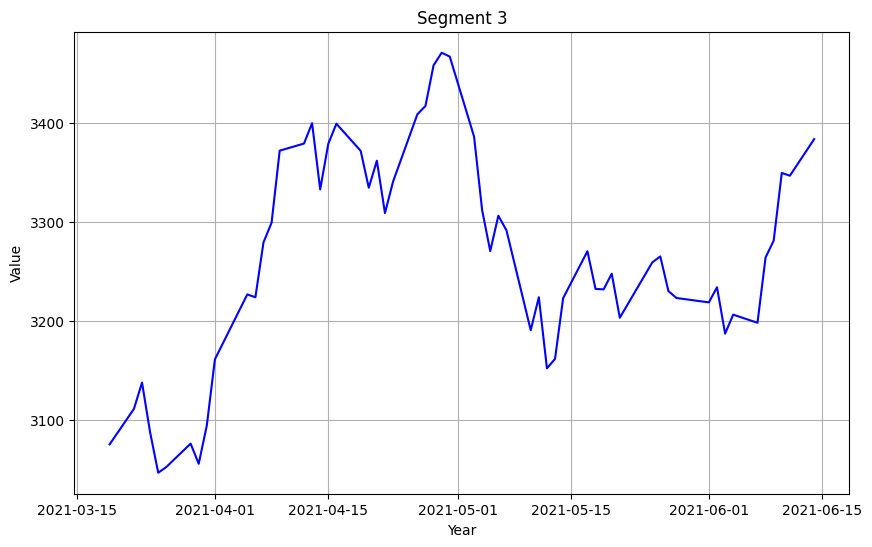

In [39]:
plot_timeseries_sequence(segment_3["Close"], "Segment 3", "Year", "Value", 'blue')

Let's turn the timeseries into networks (graphs)!

In [40]:
def sequence_to_graph(time_series, w, tau,use_quantiles = True, Q=4, color= 'gray'):
    strategy = TimeseriesToOrdinalPatternGraph (w, tau, use_quantiles = use_quantiles, Q= Q)
    g = strategy.to_graph(time_series)
    pos= nx.circular_layout(g)
    plt.figure(1,figsize=(8,8))
    
    all_weights = []
    for (q1, q2, data) in g.edges(data=True):
        all_weights.append(data['weight'])
    unique_weights = list(set(all_weights))
    
    nx.draw_networkx_nodes(g, pos, g.nodes, node_size=300, node_color = color)
    
    labels = {node: node for node in g.nodes()}
    nx.draw_networkx_labels(g, pos, labels, font_size=12, font_color='black')
    
    for weight in unique_weights:
        weighted_edges = [(q1, q2) for (q1, q2, edge_attr) in g.edges(data=True) if edge_attr['weight']==weight]
        width = weight*len(g.nodes)*5.0/sum(all_weights)
        nx.draw_networkx_edges(g,pos,edgelist=weighted_edges,width=width,edge_color='black',node_size=300)
        
plt.show()

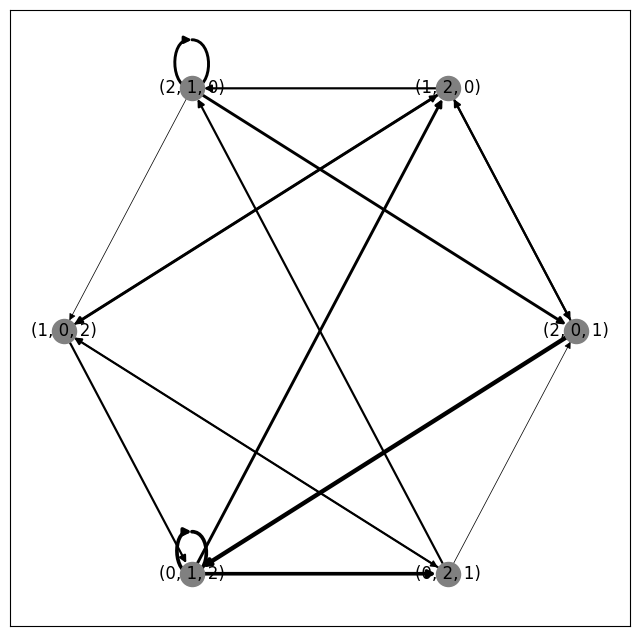

In [41]:
sequence_to_graph(segment_1["Close"],3,1,use_quantiles = False,color='gray')

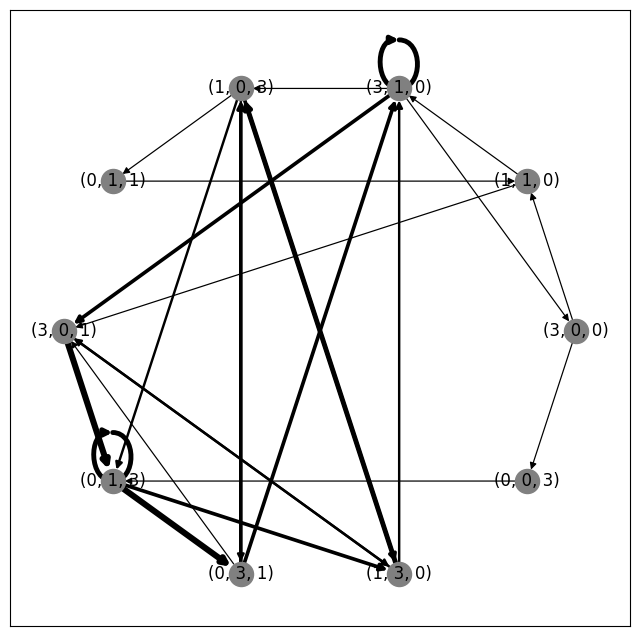

In [42]:
sequence_to_graph(segment_1["Close"],3,1,use_quantiles = True, Q = 4,color='gray')

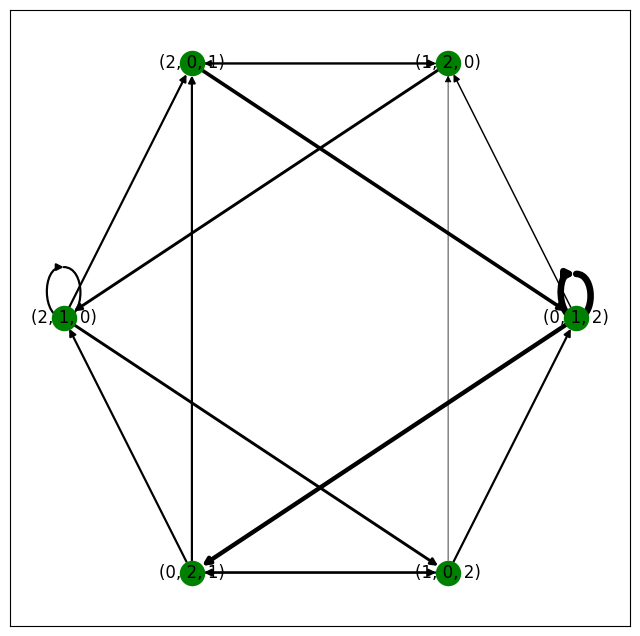

In [43]:
sequence_to_graph(segment_2["Close"],3,1,use_quantiles = False,color= 'green')

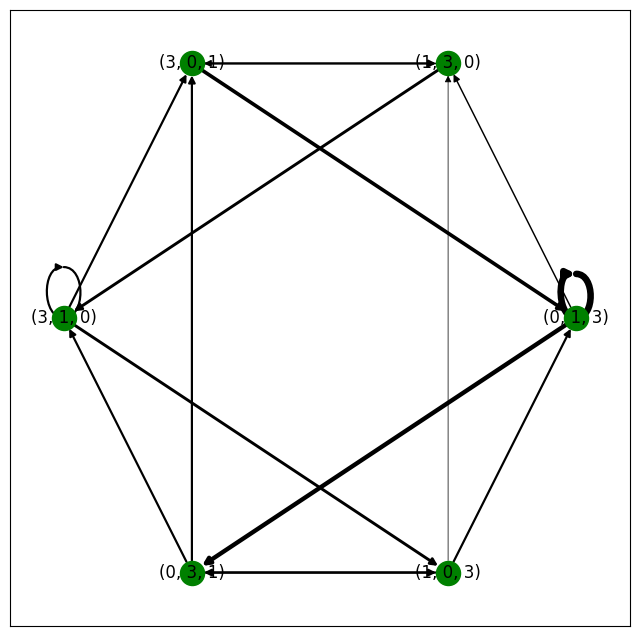

In [44]:
sequence_to_graph(segment_2["Close"],3,1,use_quantiles = True,Q=4, color= 'green')

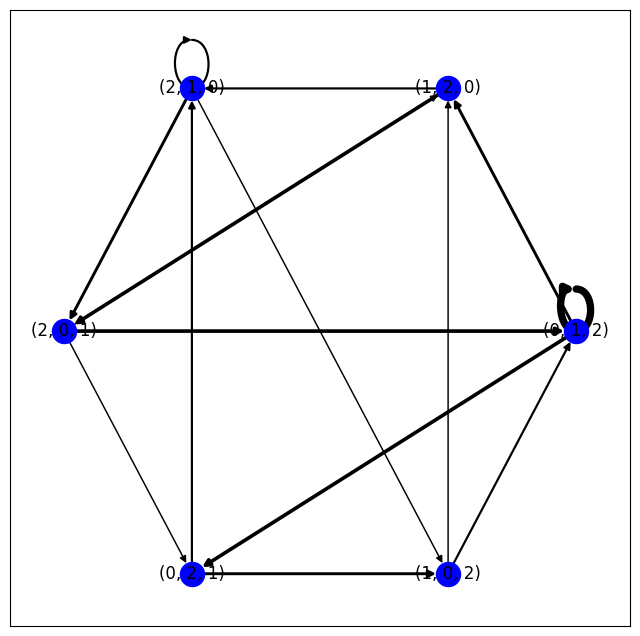

In [45]:
sequence_to_graph(segment_3["Close"],3,1,use_quantiles = False,color= 'blue')

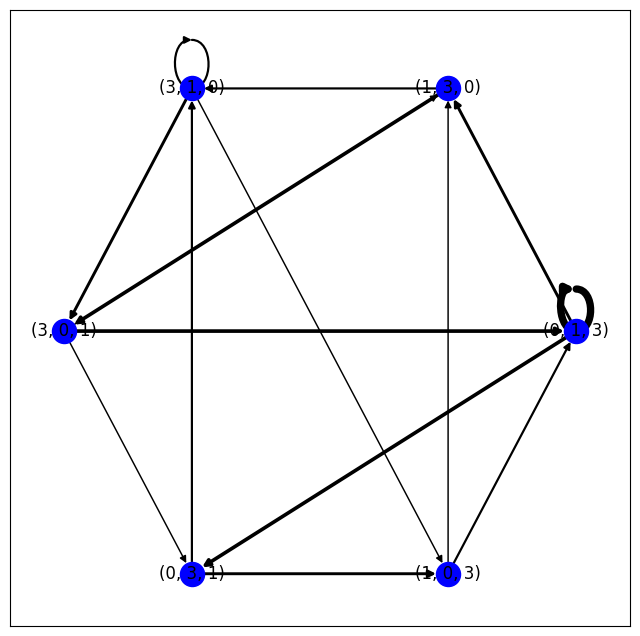

In [46]:
sequence_to_graph(segment_3["Close"],3,1,use_quantiles = True, Q=4,color= 'blue')

In [86]:
# x = list(range(1,21))
x = list(range(1,21))
y = [1,2,3,4,5,6,7,8,9,10,10, 9,8,7,6,5,4,3,2,1]

# y = [0.35, 0.9, 0.3, 0.8, 0.6, 0.95, 0.1, 0.4, 0.9, 0.15, 0.5, 5, 0.05, 0.1, 0.2, 0.7, 0.6, 0.9, 0.3, 0.4]

df = pd.DataFrame({'x': x, 'y': y})
df.set_index("x", inplace=True)

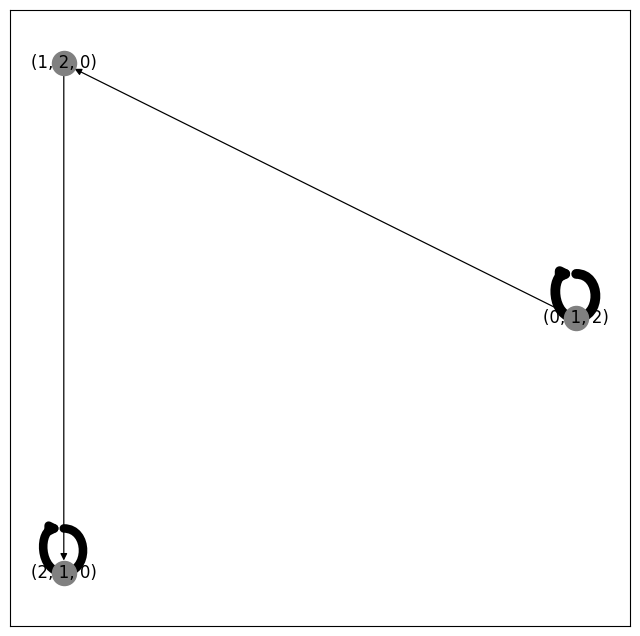

In [87]:
sequence_to_graph(df["y"],3,1,use_quantiles = False,color='gray')

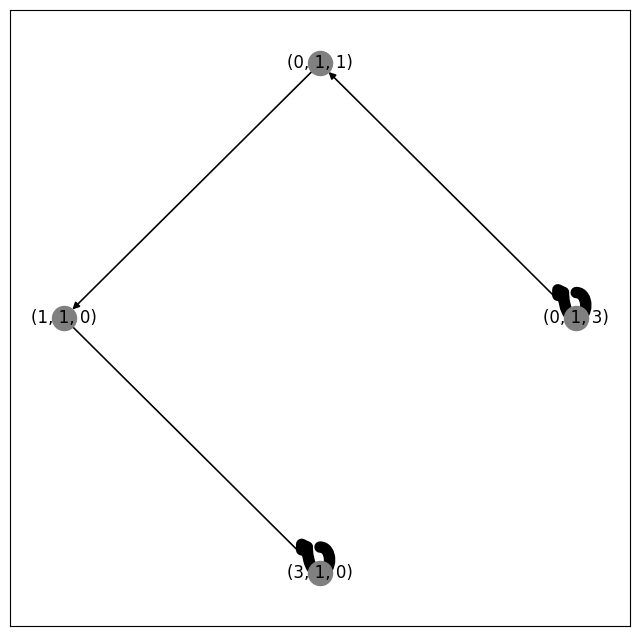

In [88]:
sequence_to_graph(df["y"],3,1,use_quantiles = True,color='gray')

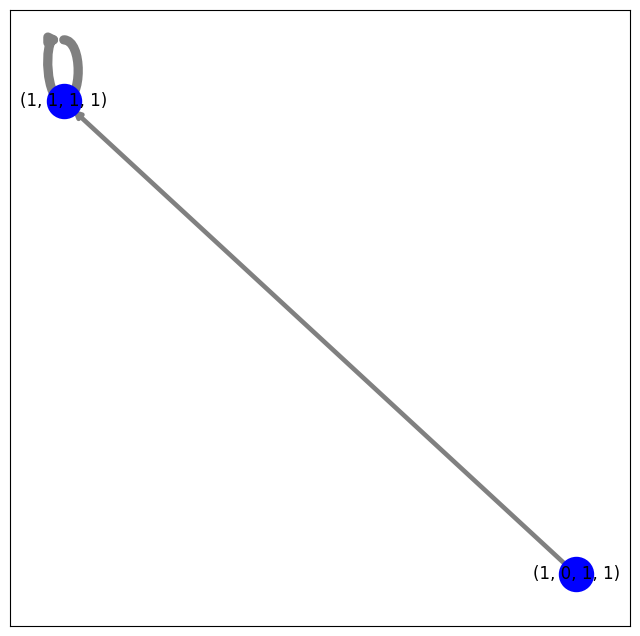

In [90]:
time_series = [
    np.array([2, 3, 4, 5, 6]),
    np.array([5, 4, 6, 7, 8]),
    np.array([3, 4, 5, 6, 7]),
    np.array([6, 7, 8, 9, 10])
]
graph_2 = TimeseriesToOrdinalPatternGraph(w=2, tau=1)
g = graph_2.to_graph(time_series)

# Draw the graph with weights and different line styles

pos= nx.spring_layout(g)
plt.figure(1,figsize=(8,8))

all_weights = []
for (q1, q2, data) in g.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))

nx.draw_networkx_nodes(g, pos, g.nodes, node_size=600, node_color = 'blue')

labels = {node: node for node in g.nodes()}
nx.draw_networkx_labels(g, pos, labels, font_size=12, font_color='black')

for weight in unique_weights:
    weighted_edges = [(q1, q2) for (q1, q2, edge_attr) in g.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(g.nodes)*5.0/sum(all_weights)
    nx.draw_networkx_edges(g,pos,edgelist=weighted_edges,width=width,edge_color='gray',node_size=300)
    
plt.show()

In [91]:
print(np.array(segment_1['Close']))

[2.328125 2.197917 2.197917 2.15625  2.114583 2.041667 2.166667 2.166667
 2.114583 2.125    2.21875  2.34375  2.317708 2.375    2.338542 2.354167
 2.333333 2.552083 2.5      3.       3.239583 3.302083 3.15625  3.6875
 3.09375  3.354167 3.40625  3.291667 3.947917 4.5      4.625    4.375
 4.078125 4.166667 4.041667 4.338542 4.020833 4.010417 4.015625 4.125
 4.057292 4.005208 3.75     3.901042 4.       3.979167 3.921875 3.625
 3.625    3.822917 4.427083 4.520833 4.5      5.026042 4.270833 4.947917
 5.390625 5.125    5.083333 5.072917]


In [92]:
np.array([2, 3, 4, 5, 6])

array([2, 3, 4, 5, 6])

In [93]:
print(time_series)

[array([2, 3, 4, 5, 6]), array([5, 4, 6, 7, 8]), array([3, 4, 5, 6, 7]), array([ 6,  7,  8,  9, 10])]


In [95]:
seg1 = np.array(segment_1["Close"])
seg2 = np.array(segment_2["Close"])
seg3 = np.array(segment_3["Close"])

In [96]:
import numpy as np

# List of empty lists
list_of_empty_lists = [[], [], []]

# Convert each empty list to a NumPy array
list_of_empty_arrays = [np.array(empty_list) for empty_list in list_of_empty_lists]

# Print the resulting list of NumPy arrays
list_of_empty_arrays = [np.array([]), np.array([]), np.array([])]

# Data to fill into each array
data = [
    seg1,         # Data for the first array
    seg2,      # Data for the second array
    seg3             # Data for the third array
]

# Fill each empty array with the corresponding data
filled_arrays = [np.array(data[i]) for i in range(len(list_of_empty_arrays))]

# Print the resulting list of filled arrays
print(filled_arrays)

[array([2.328125, 2.197917, 2.197917, 2.15625 , 2.114583, 2.041667,
       2.166667, 2.166667, 2.114583, 2.125   , 2.21875 , 2.34375 ,
       2.317708, 2.375   , 2.338542, 2.354167, 2.333333, 2.552083,
       2.5     , 3.      , 3.239583, 3.302083, 3.15625 , 3.6875  ,
       3.09375 , 3.354167, 3.40625 , 3.291667, 3.947917, 4.5     ,
       4.625   , 4.375   , 4.078125, 4.166667, 4.041667, 4.338542,
       4.020833, 4.010417, 4.015625, 4.125   , 4.057292, 4.005208,
       3.75    , 3.901042, 4.      , 3.979167, 3.921875, 3.625   ,
       3.625   , 3.822917, 4.427083, 4.520833, 4.5     , 5.026042,
       4.270833, 4.947917, 5.390625, 5.125   , 5.083333, 5.072917]), array([264.769989, 269.850006, 272.869995, 267.720001, 272.339996,
       267.399994, 259.420013, 260.320007, 263.549988, 268.899994,
       268.779999, 274.700012, 254.809998, 249.740005, 253.809998,
       248.229996, 252.550003, 258.049988, 255.720001, 257.730011,
       258.679993, 260.160004, 263.630005, 264.51001 , 268.

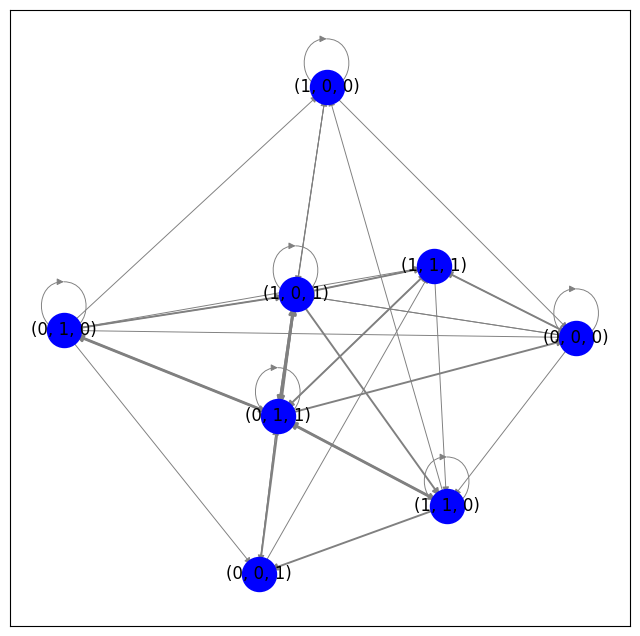

In [97]:
time_series = filled_arrays
graph_2 = TimeseriesToOrdinalPatternGraph(w=2, tau=1)
g = graph_2.to_graph(time_series)

# Draw the graph with weights and different line styles

pos= nx.spring_layout(g)
plt.figure(1,figsize=(8,8))

all_weights = []
for (q1, q2, data) in g.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))

nx.draw_networkx_nodes(g, pos, g.nodes, node_size=600, node_color = 'blue')

labels = {node: node for node in g.nodes()}
nx.draw_networkx_labels(g, pos, labels, font_size=12, font_color='black')

for weight in unique_weights:
    weighted_edges = [(q1, q2) for (q1, q2, edge_attr) in g.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(g.nodes)*5.0/sum(all_weights)
    nx.draw_networkx_edges(g,pos,edgelist=weighted_edges,width=width,edge_color='gray',node_size=300)
    
plt.show()